### Import Packages

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

### Import data

In [17]:
metadata_path = "data/manipulated"
data = pd.read_parquet(metadata_path)
data.head(5)

,path,species,diseased
0,dl/data/raw/color/Strawberry___healthy/8f55890...,Strawberry,0
1,dl/data/raw/color/Strawberry___healthy/b8e9ed2...,Strawberry,0
2,dl/data/raw/color/Strawberry___healthy/abdd34a...,Strawberry,0
3,dl/data/raw/color/Strawberry___healthy/d1aee44...,Strawberry,0
4,dl/data/raw/color/Strawberry___healthy/3d28c3e...,Strawberry,0


### Visualizations

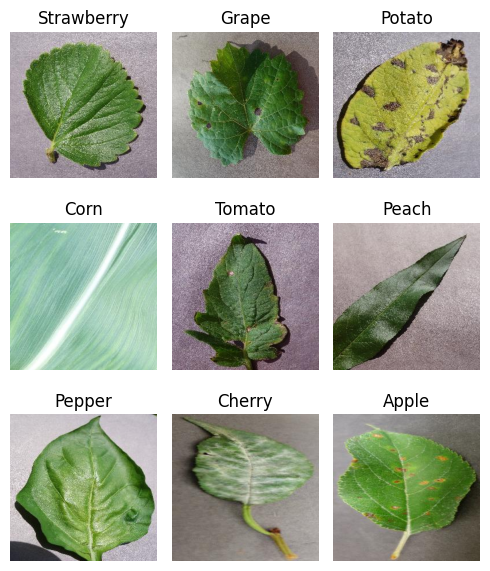

In [59]:
### Display sample images for each specie
num_classes = len(data['species'].unique())
num_images_per_row = 3
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

plt.figure(figsize=(5, 2 * num_rows))  

for i, plant_class in enumerate(data['species'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)
    
    # Inside the loop for displaying sample images
    selected_path = data[data['species'] == plant_class]['path'].iloc[0]
    image_path = os.path.join(selected_path.split("dl/")[1])

    # Check if the image exists and can be loaded
    if os.path.exists(image_path):
        sample_image = cv2.imread(image_path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {image_path}")
    else:
        print(f"Error: Image path does not exist: {image_path}")

plt.tight_layout()
plt.show()

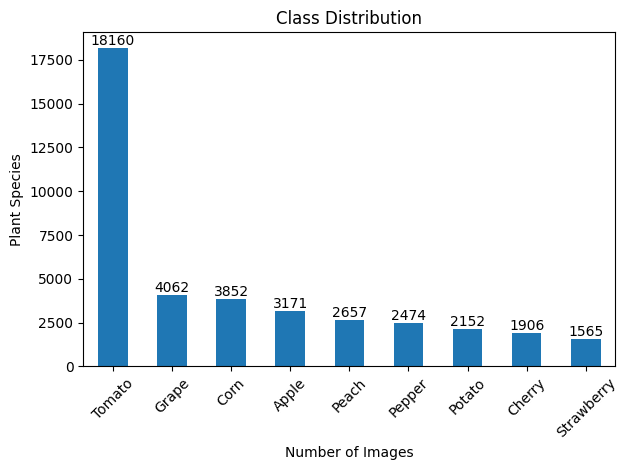

In [47]:
### Visualize total number of images per specie
# Count images per specie
specie_counts = data['species'].value_counts()

# Plotting
specie_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel('Number of Images')
plt.ylabel('Plant Species')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding text annotations to each bar
for i, v in enumerate(specie_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.show()

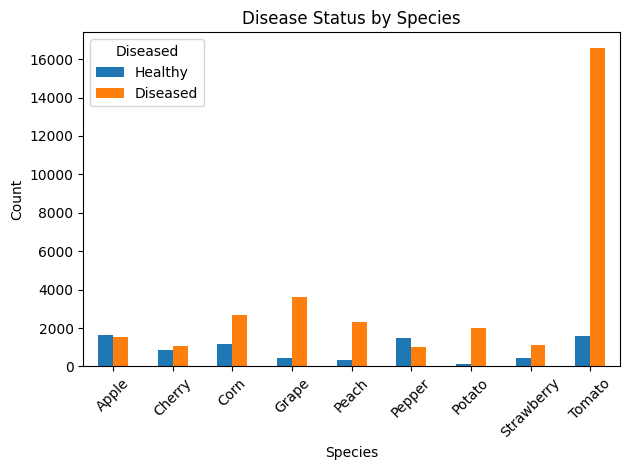

In [147]:

### Visualize the amount of diseased and healthy images per specie
# Group by species and calculate counts of diseased and healthy specimens
grouped_on_species_and_diseased = data.groupby(['species', 'diseased']).size().unstack(fill_value=0)

# Plotting
grouped_on_species_and_diseased.plot(kind='bar', stacked=False)
plt.title('Disease Status by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diseased', labels=['Healthy', 'Diseased'])
plt.tight_layout()
    
plt.show()

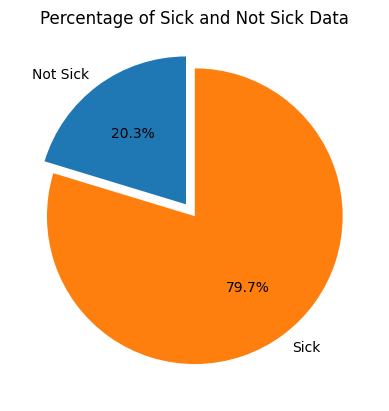

In [51]:
### Make chart to check balance of data
not_sick_percentage = len(data[data['diseased'] == 0]) / len(data) * 100
sick_percentage = len(data[data['diseased'] == 1]) / len(data) * 100

# Plotting
labels = ['Not Sick', 'Sick']
sizes = [not_sick_percentage, sick_percentage]
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Sick and Not Sick Data')
plt.show()

In [150]:
# How many images do we need to delete to get this specie in balance:
# Total images
total_data = len(data)
# Total healthy
total_healthy = len(data[data['diseased'] == 0])
# Desired percentages
desired_sick_percentage = 0.4
# Amount of images to remove
total_images_to_remove = int(total_data-(total_healthy/desired_sick_percentage))

print(f"Number of sick images to delete: {total_images_to_remove}")

Number of sick images to delete: 19699


In [165]:
grouped = grouped_on_species_and_diseased.copy()
grouped["sick_healthy_ratio"] = grouped[0]/grouped[1]

df_filtered = grouped[(grouped[0] <= grouped[1]) & (grouped["sick_healthy_ratio"] < 0.4)].copy()
total_sick = df_filtered[1].sum()
df_filtered["sick_ratios"] = df_filtered[1] / total_sick
df_filtered['images_to_remove'] = df_filtered["sick_ratios"] * total_images_to_remove
df_filtered

diseased,0,1,sick_healthy_ratio,sick_ratios,images_to_remove
species,,,,,
Grape,423,3639,0.116241,0.148500,2925.307529
Peach,360,2297,0.156726,0.093736,1846.504917
Potato,152,2000,0.076000,0.081616,1607.753520
Tomato,1591,16569,0.096023,0.676148,13319.434034
